In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style = "whitegrid")
import sklearn
import warnings
warnings.filterwarnings('ignore')

# Binary Logistic Regression

In [2]:
data = pd.read_csv("datasets/ML/log_reg_bin.csv")
data.head()

,oxygen,survive
0,10,0
1,5,0
2,75,1
3,14,0
4,8,0


### Splitting dataset into training and testing data

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,0], data.iloc[:,1], test_size = 0.25, random_state = 42)
print(len(X_train), len(y_train), len(X_test), len(y_test))

11 11 4 4


### Visualizing the training data

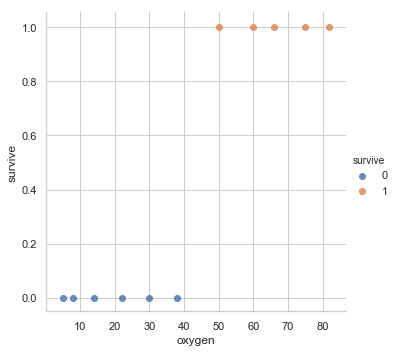

In [4]:
train = pd.DataFrame([X_train.reset_index(drop=True), y_train.reset_index(drop=True)]).T.reindex(columns = ["oxygen", "survive"])
sns.lmplot("oxygen", "survive", data = train, hue='survive', fit_reg=False)

### Building logistic regression model

In [5]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train.iloc[:,0].values.reshape(-1,1), train.iloc[:,1].values.reshape(-1,1))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Parameters

In [9]:
model.intercept_

array([-1.41956612])

In [10]:
model.coef_

array([[0.04616302]])

### Estimated values

In [12]:
est = model.predict(train.iloc[:,0].values.reshape(-1,1))
est

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0], dtype=int64)

### Confusion Matrix

In [13]:
from sklearn import metrics
actual = train.iloc[:,1].values.reshape(-1,1)
cm = metrics.confusion_matrix(actual, est, labels=[0,1])
cm

array([[5, 1],
       [0, 5]], dtype=int64)

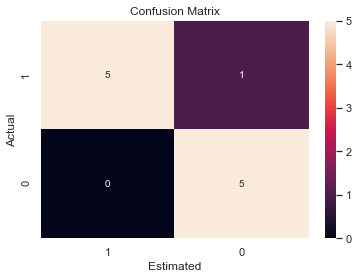

In [14]:
sns.heatmap(cm, annot=True)

# labels, title and ticks
ax = plt.subplot()
ax.set_title('Confusion Matrix'); 
ax.set_xlabel('Estimated');     ax.set_ylabel('Actual'); 
ax.xaxis.set_ticklabels([1,0]); ax.yaxis.set_ticklabels([1,0]);

## Accuracy of the model

### Training Accuracy

In [15]:
model.score(train.iloc[:,0].values.reshape(-1,1), train.iloc[:,1].values.reshape(-1,1)) * 100

90.9090909090909

### Testing Accuracy

In [16]:
model.score(X_test.values.reshape(-1,1), y_test.values.reshape(-1,1)) * 100

75.0

### Logistic regression model graph

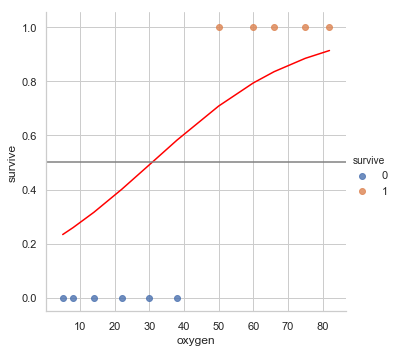

In [17]:
def model_curve(x):
    return 1 / (1 + np.exp(-x))
loss = model_curve(X_train.values.reshape(-1,1) * model.coef_ + model.intercept_).ravel()

sns.lmplot("oxygen", "survive", data = train, hue='survive', fit_reg=False)
plt.plot(np.sort(X_train),np.sort(loss), color = "red")
plt.axhline(.5, color='.5')

# Multinomial Logistic Regression

In [18]:
data = pd.read_csv("datasets/ML/log_reg_mul.csv")
data.head()

,budget,cars
0,100000,Toyota
1,250000,Toyota
2,500000,Toyota
3,750000,Toyota
4,1000000,Toyota


In [19]:
pd.unique(data.iloc[:,1])

array(['Toyota', 'Ferrari', 'Bugatti'], dtype=object)

### Splitting dataset into training and testing data

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,0], data.iloc[:,1], test_size = 0.25, random_state = 42)
print(len(X_train), len(y_train), len(X_test), len(y_test))

11 11 4 4


### Visualization 

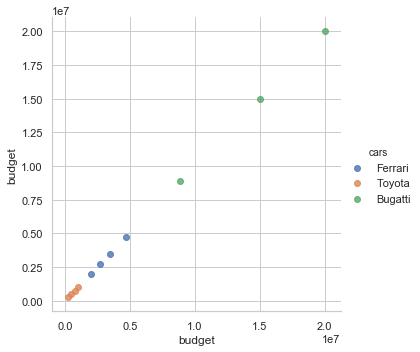

In [21]:
train = pd.DataFrame([X_train.reset_index(drop=True), y_train.reset_index(drop=True)]).T.reindex(columns = ["budget", "cars"])
sns.lmplot("budget", "budget", data = train, hue='cars', fit_reg = False)

### Building multinomial logistic regression

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class="multinomial", solver = "newton-cg")
model.fit(train.iloc[:,0].values.reshape(-1,1), train.iloc[:,1].values.reshape(-1,1))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

### Parameters

In [23]:
model.intercept_

array([-9.96197389,  0.14548522,  9.81648867])

In [24]:
model.coef_

array([[-0.01104216],
       [-0.01104368],
       [-0.01105032]])

### Estimated values

In [25]:
est = model.predict(train.iloc[:,0].values.reshape(-1,1))
est

array(['Ferrari', 'Ferrari', 'Toyota', 'Toyota', 'Bugatti', 'Toyota',
       'Ferrari', 'Bugatti', 'Bugatti', 'Toyota', 'Ferrari'], dtype=object)

### Confusion Matrix

In [26]:
from sklearn import metrics
actual = train.iloc[:,1].values.reshape(-1,1)
cm = metrics.confusion_matrix(actual, est, labels=pd.unique(data.iloc[:,1]))
cm

array([[4, 0, 0],
       [0, 4, 0],
       [0, 0, 3]], dtype=int64)

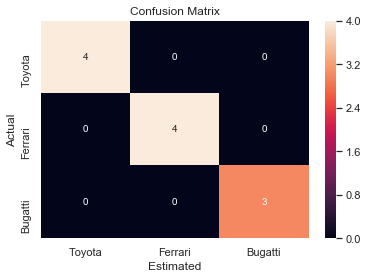

In [27]:
sns.heatmap(cm, annot=True)

# labels, title and ticks
ax = plt.subplot()
ax.set_title('Confusion Matrix'); 
ax.set_xlabel('Estimated');     ax.set_ylabel('Actual'); 
ax.xaxis.set_ticklabels(pd.unique(data.iloc[:,1])); ax.yaxis.set_ticklabels(pd.unique(data.iloc[:,1]));

## Accuracy of the model

### Training Accuracy

In [28]:
model.score(train.iloc[:,0].values.reshape(-1,1), train.iloc[:,1].values.reshape(-1,1)) * 100

100.0

### Testing Accuracy

In [29]:
model.score(X_test.values.reshape(-1,1), y_test.values.reshape(-1,1)) * 100

100.0